<a href="https://colab.research.google.com/github/aimanuel/JupyterNotebook/blob/main/6_Lending_Club_project_Exploratory_Exclude_Outlier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import necessary library

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
original_filepath = '/content/drive/MyDrive/13. Python/Machine Learning/TensorFlow_FILES/DATA/lending_club_loan_two.csv'

In [ ]:
df = pd.read_csv(original_filepath)
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


# 'Annual_inc' = Annual Income Exploratory & Exclude Outlier

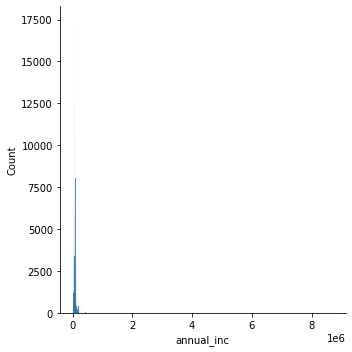

In [ ]:
# there's extreme outlier on the annual inc,
# after looking at the data, it's best to delete 1% of the data
# that's sorted from the highest annual_inc.
# let's exclude these outliers, it'll be new range annual_inc 0 - 250k
sns.displot(x='annual_inc',data=df)

In [ ]:
# the highest 1000 data still has annual inc 375,000
df.sort_values('annual_inc',ascending=False).head(1000)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
308700,8000.0,36 months,13.66,272.11,C,C3,Correctional Sgt.,10+ years,MORTGAGE,8706582.0,Source Verified,Jan-2015,Charged Off,credit_card,Credit card refinancing,0.11,Jul-2000,11.0,0.0,16449.0,54.1,18.0,w,INDIVIDUAL,1.0,0.0,"2410 Luna Station\nSouth Brandi, HI 93700"
318255,10000.0,36 months,6.89,308.27,A,A3,Interim Director of Case Management,3 years,MORTGAGE,7600000.0,Source Verified,Sep-2015,Fully Paid,home_improvement,Home improvement,0.09,Feb-1989,18.0,0.0,2494.0,15.7,27.0,f,INDIVIDUAL,1.0,0.0,USCGC Foley\nFPO AA 00813
100370,20000.0,36 months,7.62,623.23,A,A3,Registered Nurse,5 years,RENT,7446395.0,Source Verified,Feb-2014,Fully Paid,debt_consolidation,Debt consolidation,0.13,Apr-1993,10.0,0.0,24494.0,50.7,24.0,w,INDIVIDUAL,0.0,0.0,"PSC 6677, Box 0869\nAPO AP 00813"
376306,14825.0,36 months,13.11,500.30,B,B4,Us postal service,10+ years,MORTGAGE,7141778.0,Source Verified,Dec-2012,Fully Paid,debt_consolidation,Debt consolidation,0.25,Mar-1996,17.0,0.0,11351.0,70.9,31.0,w,INDIVIDUAL,1.0,0.0,"1466 Tucker Highway Apt. 190\nNew Harry, GA 29597"
100946,25000.0,36 months,6.89,770.68,A,A3,Legal admin asst,6 years,MORTGAGE,7000000.0,Source Verified,Dec-2015,Fully Paid,debt_consolidation,Debt consolidation,0.24,Feb-2000,22.0,0.0,25621.0,35.0,45.0,w,INDIVIDUAL,3.0,0.0,"15345 Peter Light\nNew Richardburgh, NH 70466"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231825,35000.0,36 months,11.47,1153.67,B,B5,Loan Officer,2 years,MORTGAGE,375000.0,Verified,Feb-2016,Fully Paid,credit_card,Credit card refinancing,2.84,Dec-1999,5.0,0.0,22642.0,60.4,21.0,w,INDIVIDUAL,1.0,0.0,"3517 Lopez Brook\nStevenstad, GA 00813"
123350,10000.0,36 months,11.99,332.10,B,B3,Attorney,10+ years,OWN,375000.0,Verified,Dec-2013,Fully Paid,debt_consolidation,Debt consolidation,8.32,Apr-1991,6.0,0.0,23077.0,94.6,22.0,f,INDIVIDUAL,4.0,0.0,"0289 Lawrence Extension\nKathrynberg, GA 22690"
336981,10000.0,36 months,6.03,304.36,A,A1,Counsel,10+ years,MORTGAGE,375000.0,Not Verified,Aug-2014,Fully Paid,debt_consolidation,Debt consolidation,6.38,Nov-1993,11.0,0.0,9423.0,18.0,24.0,f,INDIVIDUAL,8.0,0.0,"0282 Odonnell Streets\nNew Sierramouth, WV 48052"
30997,35000.0,60 months,12.69,790.82,C,C2,Owner/Dentist,10+ years,MORTGAGE,375000.0,Source Verified,Feb-2015,Fully Paid,debt_consolidation,Debt consolidation,5.72,Aug-1988,9.0,0.0,63227.0,76.5,36.0,w,INDIVIDUAL,7.0,0.0,"648 Evans Brook Apt. 973\nEast Alan, AL 48052"


## Exclude 1% of the sorted highest annual income

In [ ]:
len(df)*0.01

3960.3

In [ ]:
df = df.sort_values('annual_inc',ascending=False).iloc[3960:]

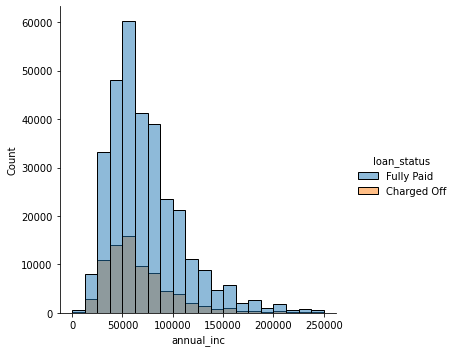

In [ ]:
# much better, and the highest income is around 60k/year
# the charged of has higher rate in < 50k
sns.displot(x='annual_inc',data=df,bins=20,hue='loan_status')

# 'Loan_amnt' = Loan Amount Exploratory & Exclude Outlier

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


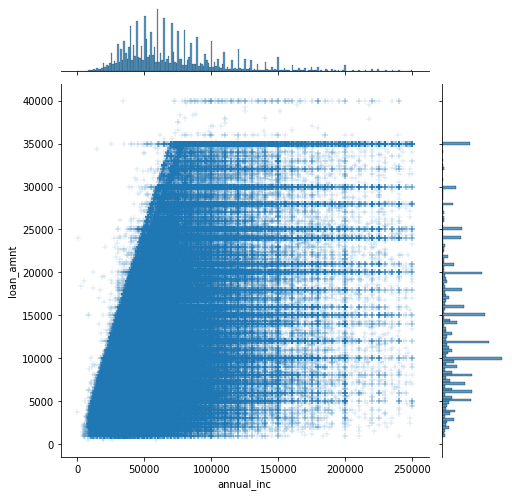

In [ ]:
# loan amount > 35000$ isn't that much, we can consider this as an outlier to the model
sns.jointplot(x='annual_inc',y='loan_amnt',data=df,marker='+',size=7,alpha=0.3);

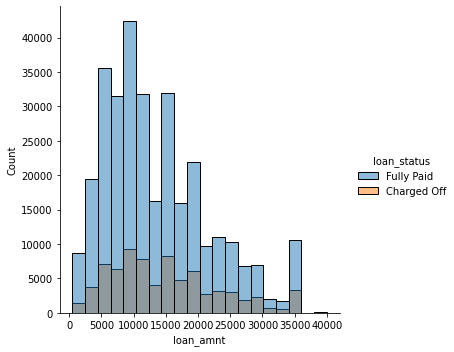

In [ ]:
# the 40k loan is pretty much an outlier, and unusual.
# most dense loan in 10k
sns.displot(x='loan_amnt',data=df,bins=20,hue='loan_status')

## Exclude 40k (or loan >35k)

In [ ]:
df=df[df['loan_amnt']<= 35000]

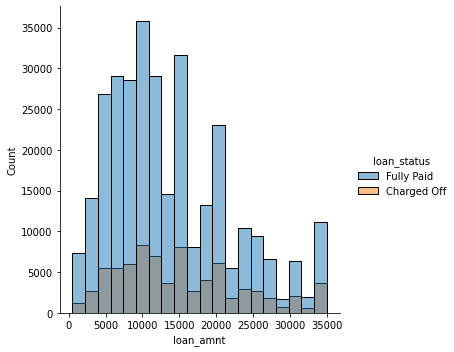

In [ ]:
# check if it's already excluded
sns.displot(x='loan_amnt',data=df,bins=20,hue='loan_status');

# 'Int_rate' = Interest rate Exploratory & Exclude Outlier

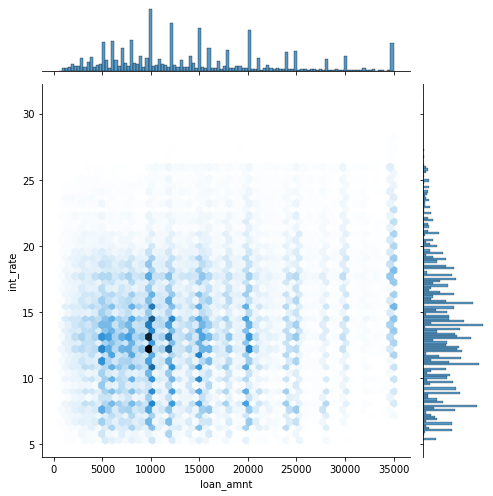

In [ ]:
# highest density around 12.5% int_rate with 10k loan amount
sns.jointplot(x='loan_amnt',y='int_rate',data=df,height=7,kind='hex');

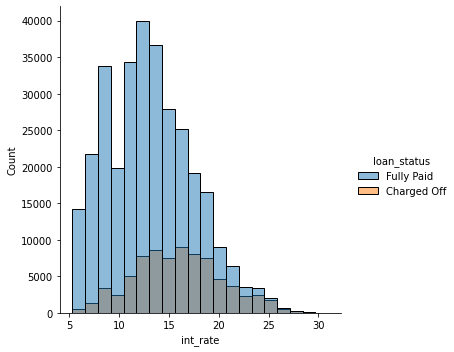

In [ ]:
# higher int.rate = higher default
sns.displot(x='int_rate',data=df,bins=20,hue='loan_status')

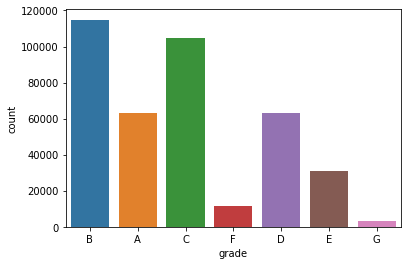

In [ ]:
sns.countplot(x='grade',data=df)

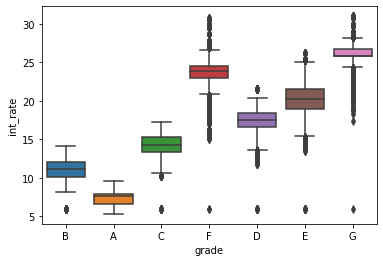

In [ ]:
# grade A got the lowest int_rate, start from grade C is above 15%
# there's an outlier in grade B-G  with low interest. let's look at it.
sns.boxplot(x='grade',y='int_rate',data=df)

source for <br> 
figsize : https://stackoverflow.com/questions/14770735/how-do-i-change-the-figure-size-with-subplots

subplots : https://stackoverflow.com/questions/52472757/creating-a-boxplot-facetgrid-in-seaborn-for-python

there's indeed outliers of int_rate from B-G

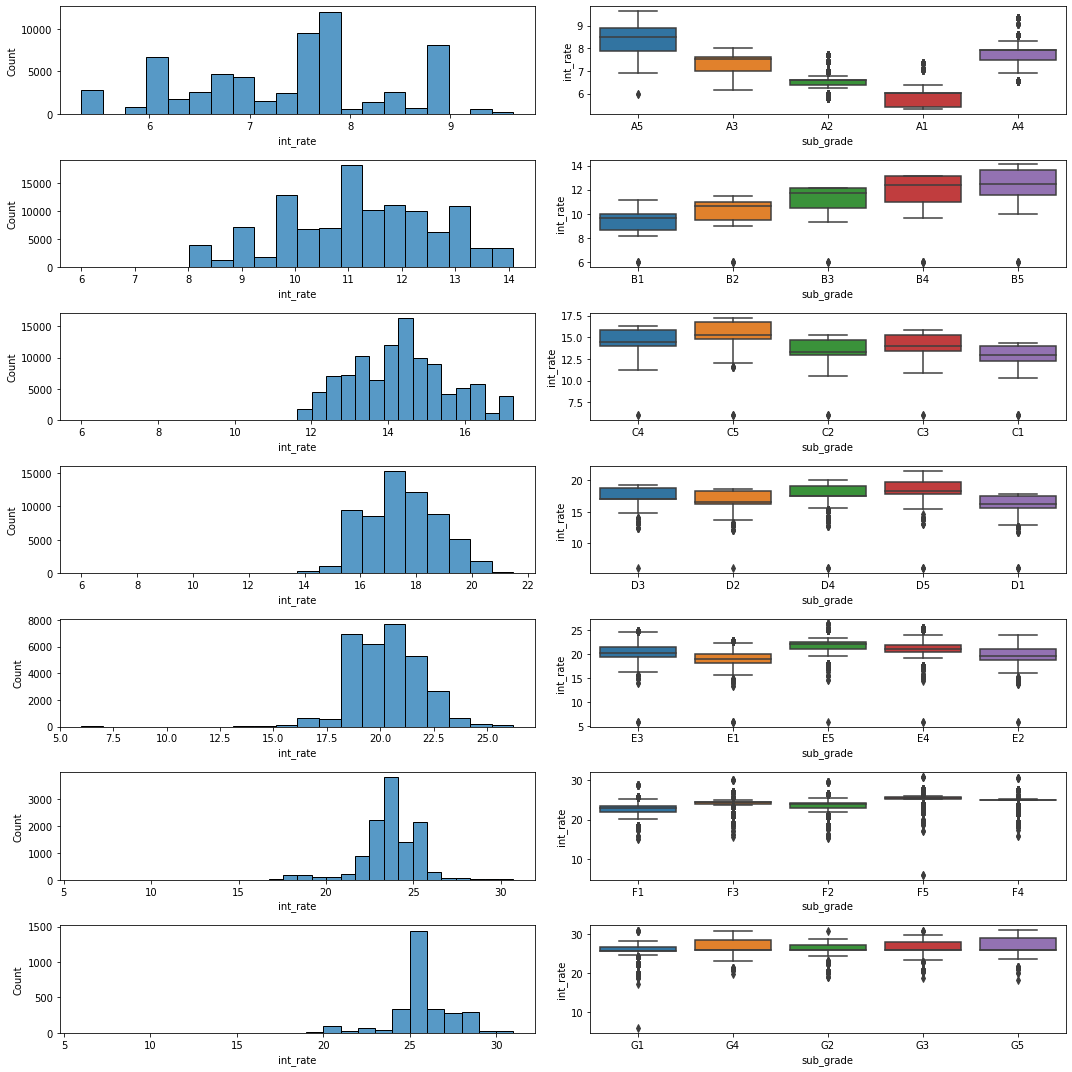

In [ ]:
fig, axes = plt.subplots(7, 2,figsize=(15,15))

ax = sns.histplot(x='int_rate', data=df[df['grade']=='A'], bins=20, 
    ax=axes[0, 0])
ax = sns.boxplot(x='sub_grade', y='int_rate', data=df[df['grade']=='A'], orient='v', 
    ax=axes[0, 1])

ax = sns.histplot(x='int_rate', data=df[df['grade']=='B'], bins=20, 
    ax=axes[1, 0])
ax = sns.boxplot(x='sub_grade', y='int_rate', data=df[df['grade']=='B'], orient='v', 
    ax=axes[1, 1])

ax = sns.histplot(x='int_rate', data=df[df['grade']=='C'], bins=30, 
    ax=axes[2, 0])
ax = sns.boxplot(x='sub_grade', y='int_rate', data=df[df['grade']=='C'], orient='v', 
    ax=axes[2, 1])

ax = sns.histplot(x='int_rate', data=df[df['grade']=='D'], bins=20, 
    ax=axes[3, 0])
ax = sns.boxplot(x='sub_grade', y='int_rate', data=df[df['grade']=='D'], orient='v', 
    ax=axes[3, 1])

ax = sns.histplot(x='int_rate', data=df[df['grade']=='E'], bins=20, 
    ax=axes[4, 0])
ax = sns.boxplot(x='sub_grade', y='int_rate', data=df[df['grade']=='E'], orient='v', 
    ax=axes[4, 1])

ax = sns.histplot(x='int_rate', data=df[df['grade']=='F'], bins=30, 
    ax=axes[5, 0])
ax = sns.boxplot(x='sub_grade', y='int_rate', data=df[df['grade']=='F'], orient='v', 
    ax=axes[5, 1])

ax = sns.histplot(x='int_rate', data=df[df['grade']=='G'], bins=25, 
    ax=axes[6, 0])
ax = sns.boxplot(x='sub_grade', y='int_rate', data=df[df['grade']=='G'], orient='v', 
    ax=axes[6, 1])

plt.tight_layout()

## Exclude B-G int_rate outliers

Based on the exporatory data, let's exclude grade with int_rate
*   B < 8
*   C < 10
*   D < 10
*   E < 10
*   G < 10


In [ ]:
a_df = df[df['grade']=='A']
b_df = df[df['grade']=='B']
c_df = df[df['grade']=='C']
d_df = df[df['grade']=='D']
e_df = df[df['grade']=='E']
f_df = df[df['grade']=='F']
g_df = df[df['grade']=='G']

### Exclude Outlier of grade B (outlier < 8%)

In [ ]:
print('actual data :',b_df.shape[0])
print('outlier :',b_df[b_df['int_rate']<8].shape[0])
print('%outlier :',b_df[b_df['int_rate']<8].shape[0]*100/b_df.shape[0],'%')

actual data : 114881
outlier : 24
%outlier : 0.020891183050286817 %


In [ ]:
b_df = b_df[b_df['int_rate']>=8]

### Exclude Outlier of grade C (outlier <10%)

In [ ]:
print('actual data :',c_df.shape[0])
print('outlier :',c_df[c_df['int_rate']<10].shape[0])
print('%outlier :',c_df[c_df['int_rate']<10].shape[0]*100/c_df.shape[0],'%')

actual data : 104964
outlier : 16
%outlier : 0.015243321519759155 %


In [ ]:
c_df = c_df[c_df['int_rate']>=10]

### Exclude Outlier of grade D (outlier < 10)

In [ ]:
print('actual data :',d_df.shape[0])
print('outlier :',d_df[d_df['int_rate']<10].shape[0])
print('%outlier :',d_df[d_df['int_rate']<10].shape[0]*100/d_df.shape[0],'%')

actual data : 62930
outlier : 12
%outlier : 0.019068806610519625 %


In [ ]:
d_df = d_df[d_df['int_rate']>=10]

### Exclude Outlier of grade E (outlier < 10)

In [ ]:
print('actual data :',e_df.shape[0])
print('outlier :',e_df[e_df['int_rate']<10].shape[0])
print('%outlier :',e_df[e_df['int_rate']<10].shape[0]*100/e_df.shape[0],'%')

actual data : 31168
outlier : 13
%outlier : 0.0417094455852156 %


In [ ]:
e_df = e_df[e_df['int_rate']>=10]

### Exclude Outlier of grade F (outlier < 10)

In [ ]:
print('actual data :',f_df.shape[0])
print('outlier :',f_df[f_df['int_rate']<10].shape[0])
print('%outlier :',f_df[f_df['int_rate']<10].shape[0]*100/f_df.shape[0],'%')

actual data : 11650
outlier : 2
%outlier : 0.017167381974248927 %


In [ ]:
f_df = f_df[f_df['int_rate']>=10]

### Exclude Outlier of grade G (outlier < 10)

In [ ]:
print('actual data :',g_df.shape[0])
print('outlier :',g_df[g_df['int_rate']<10].shape[0])
print('%outlier :',g_df[g_df['int_rate']<10].shape[0]*100/g_df.shape[0],'%')

actual data : 3002
outlier : 1
%outlier : 0.033311125916055964 %


In [ ]:
g_df = g_df[g_df['int_rate']>=10]

### Let's combine again into df after excluding the outliers

and take a look using charts again

In [ ]:
df = pd.concat([a_df, b_df, c_df, d_df, e_df, f_df, g_df])

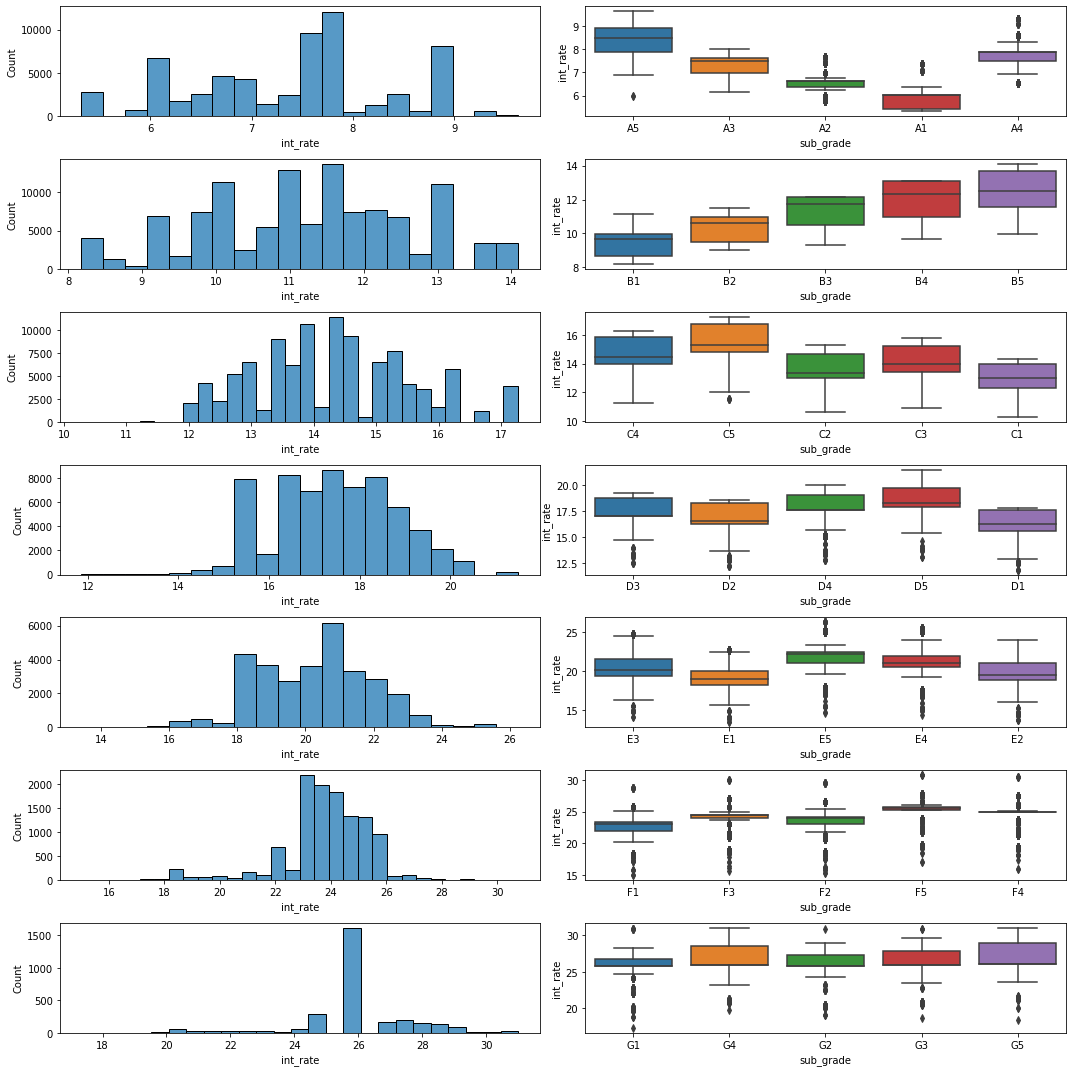

In [ ]:
fig, axes = plt.subplots(7, 2,figsize=(15,15))

ax = sns.histplot(x='int_rate', data=df[df['grade']=='A'], bins=20, 
    ax=axes[0, 0])
ax = sns.boxplot(x='sub_grade', y='int_rate', data=df[df['grade']=='A'], orient='v', 
    ax=axes[0, 1])

ax = sns.histplot(x='int_rate', data=df[df['grade']=='B'], bins=20, 
    ax=axes[1, 0])
ax = sns.boxplot(x='sub_grade', y='int_rate', data=df[df['grade']=='B'], orient='v', 
    ax=axes[1, 1])

ax = sns.histplot(x='int_rate', data=df[df['grade']=='C'], bins=30, 
    ax=axes[2, 0])
ax = sns.boxplot(x='sub_grade', y='int_rate', data=df[df['grade']=='C'], orient='v', 
    ax=axes[2, 1])

ax = sns.histplot(x='int_rate', data=df[df['grade']=='D'], bins=20, 
    ax=axes[3, 0])
ax = sns.boxplot(x='sub_grade', y='int_rate', data=df[df['grade']=='D'], orient='v', 
    ax=axes[3, 1])

ax = sns.histplot(x='int_rate', data=df[df['grade']=='E'], bins=20, 
    ax=axes[4, 0])
ax = sns.boxplot(x='sub_grade', y='int_rate', data=df[df['grade']=='E'], orient='v', 
    ax=axes[4, 1])

ax = sns.histplot(x='int_rate', data=df[df['grade']=='F'], bins=30, 
    ax=axes[5, 0])
ax = sns.boxplot(x='sub_grade', y='int_rate', data=df[df['grade']=='F'], orient='v', 
    ax=axes[5, 1])

ax = sns.histplot(x='int_rate', data=df[df['grade']=='G'], bins=25, 
    ax=axes[6, 0])
ax = sns.boxplot(x='sub_grade', y='int_rate', data=df[df['grade']=='G'], orient='v', 
    ax=axes[6, 1])

plt.tight_layout()

In [ ]:
df.sort_index()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,Source Verified,Oct-2015,Fully Paid,debt_consolidation,Debt consolidation,15.63,Nov-2004,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,Source Verified,Feb-2015,Fully Paid,debt_consolidation,Debt consolidation,21.45,Feb-2006,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\nRachelborough, LA..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,Verified,Oct-2013,Fully Paid,debt_consolidation,pay off credit cards,17.56,Mar-1997,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\nReedfort, NY 70466"
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,Verified,Aug-2012,Fully Paid,debt_consolidation,Loanforpayoff,15.88,Nov-1990,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2..."


# 'Revol_util' = Revolving Utilization Exploratory & Exclude Outlier

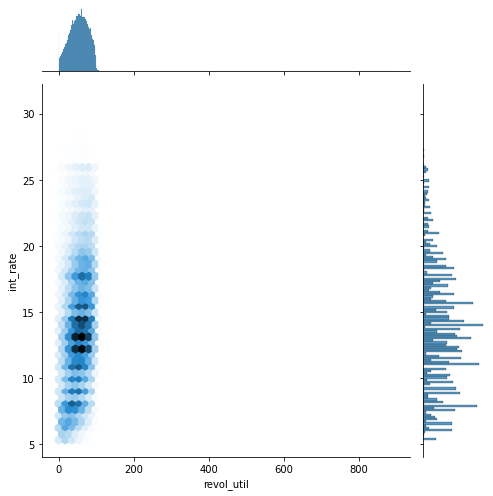

In [ ]:
# seems we had an outlier in Revol_util, let's check it out
sns.jointplot(x='revol_util',y='int_rate',data=df,height=7,kind='hex');

In [ ]:
# there's only 1 data that's using up until 892% credit limits.
# this is clearly an outliers. while others in 150% at most
df.sort_values('revol_util',ascending=False).head(10)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
137211,3500.0,36 months,12.49,117.08,B,B4,Budget Analyst,10+ years,RENT,45000.0,Verified,Apr-2014,Fully Paid,debt_consolidation,Debt consolidation,14.67,Oct-1998,2.0,0.0,2677.0,892.3,9.0,f,INDIVIDUAL,0.0,0.0,"12506 Connie Burg\nVelasquezfort, TN 00813"
329037,35000.0,36 months,25.83,1407.01,G,G2,HR Director,10+ years,RENT,165800.0,Verified,Mar-2014,Fully Paid,debt_consolidation,Debt consolidation,7.42,Jul-2005,5.0,0.0,16521.0,153.0,5.0,f,INDIVIDUAL,0.0,0.0,"7421 Pamela Pines Suite 835\nSouth Kyletown, O..."
82600,12000.0,60 months,16.55,295.34,D,D2,NaN,NaN,MORTGAGE,45600.0,Verified,Nov-2015,Fully Paid,other,Other,38.98,Apr-2002,5.0,0.0,13880.0,152.5,11.0,f,INDIVIDUAL,5.0,0.0,"595 Hall Flat\nPort Heatherbury, NE 48052"
65687,10000.0,36 months,14.16,342.56,C,C2,Superintendent,10+ years,OWN,91000.0,Not Verified,Apr-2014,Fully Paid,debt_consolidation,Debt consolidation,20.94,Jul-1997,9.0,0.0,9344.0,150.7,37.0,f,INDIVIDUAL,6.0,0.0,"159 Melanie Rue Suite 337\nJenniferview, WI 70466"
350333,25000.0,60 months,20.49,669.19,E,E2,VP of MultiFamily Investments,5 years,RENT,100000.0,Source Verified,Apr-2014,Charged Off,debt_consolidation,Debt consolidation,15.16,Nov-2001,5.0,0.0,20133.0,148.0,7.0,w,INDIVIDUAL,0.0,0.0,"175 Martinez Corners Apt. 773\nNicholsland, VA..."
165111,12600.0,36 months,8.39,397.11,A,A5,"AVP, Senior Leasing Assistant",8 years,MORTGAGE,96011.0,Not Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,11.56,Apr-1981,9.0,0.0,20033.0,146.1,22.0,w,INDIVIDUAL,4.0,0.0,"47969 Davis Divide Suite 571\nLake Daniel, OK ..."
312268,8000.0,36 months,11.99,265.68,C,C1,SR SAP SECURITY CONSULTANT,4 years,MORTGAGE,105000.0,Verified,Dec-2015,Fully Paid,car,Car financing,8.58,Sep-2000,5.0,0.0,7000.0,145.8,19.0,w,INDIVIDUAL,1.0,0.0,"95846 James Brook Apt. 765\nNorth Brandiview, ..."
296174,12000.0,36 months,20.31,447.87,D,D5,World Travel Holdings,5 years,MORTGAGE,200000.0,Source Verified,Sep-2013,Fully Paid,debt_consolidation,Debt Consolidation,26.35,Jun-1990,9.0,0.0,27233.0,140.4,28.0,f,INDIVIDUAL,4.0,0.0,"968 Hamilton River\nFinleybury, VA 00813"
108246,10000.0,36 months,17.27,357.88,D,D2,Driller Apprentice,2 years,RENT,60000.0,Source Verified,Feb-2016,Charged Off,credit_card,NaN,6.96,Aug-2005,4.0,0.0,4100.0,136.7,6.0,f,INDIVIDUAL,0.0,0.0,"8513 Simpson Islands\nNorth Joshua, ID 22690"
211426,9175.0,36 months,17.57,329.73,D,D4,Deckhand,6 years,RENT,45000.0,Verified,Apr-2015,Charged Off,debt_consolidation,Debt consolidation,28.67,Mar-2007,4.0,0.0,18632.0,132.1,10.0,f,INDIVIDUAL,0.0,0.0,"4102 Leonard Unions\nEast Heather, SC 22690"


## Exclude Outlier of Revo_util

In [ ]:
df = df.sort_values('revol_util',ascending=False).iloc[1:]

# Further Exploratory on other columns

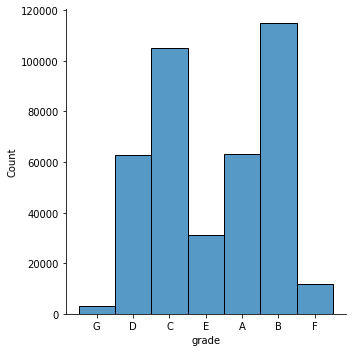

In [ ]:
sns.displot(data=df,x='grade')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text major ticklabel objects>)

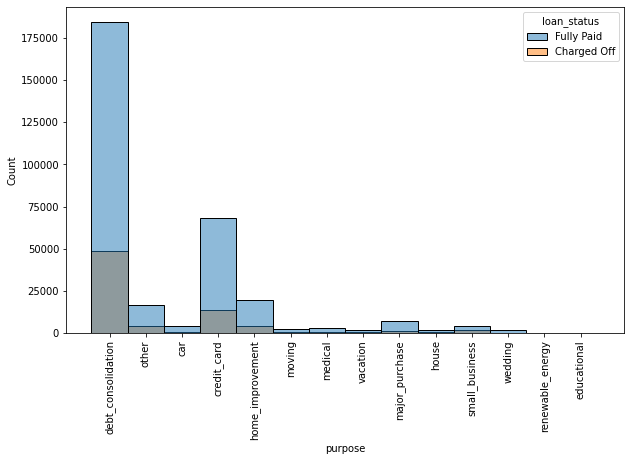

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(x='purpose', data=df, bins=20, hue='loan_status')
plt.xticks(rotation=90)

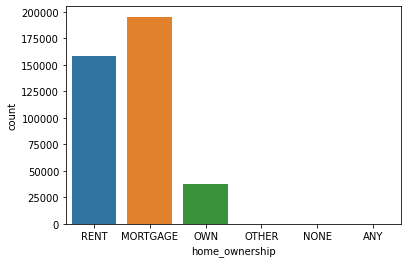

In [ ]:
# data too small for "other", "none", "any"
sns.countplot(x='home_ownership', data=df)

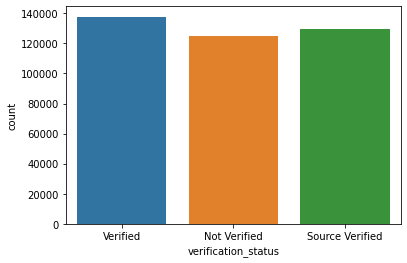

In [ ]:
# almost balanced for the verification stats
sns.countplot(x='verification_status', data=df)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 <a list of 11 Text major ticklabel objects>)

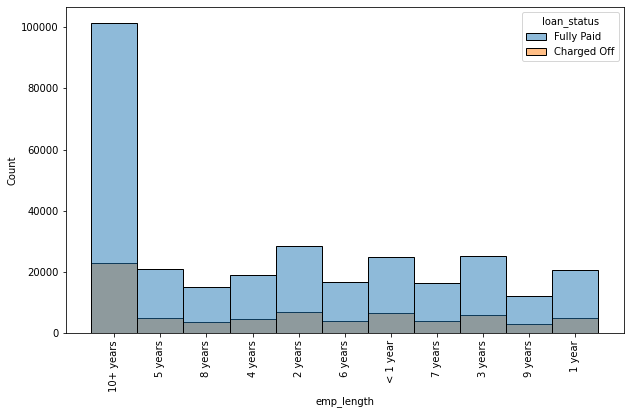

In [ ]:
# highest have 10+ yrs experience.
# charged off ratio seems don't have significance diff between emp_length
plt.figure(figsize=(10,6))
sns.histplot(x='emp_length', data=df, bins=20, hue='loan_status')
plt.xticks(rotation=90)

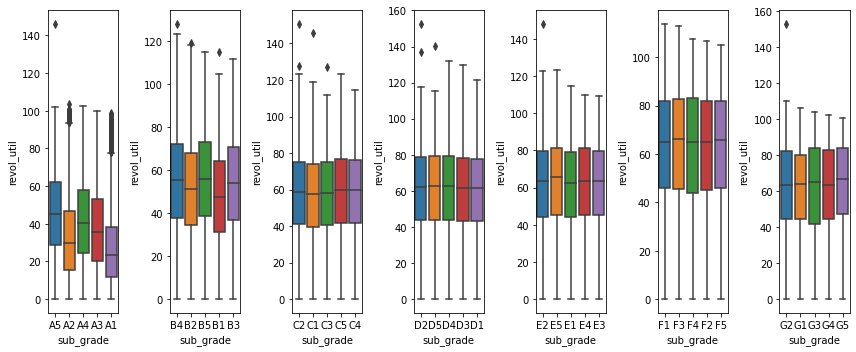

In [ ]:
fig, axes = plt.subplots(1, 7,figsize=(12,5))

ax = sns.boxplot(x='sub_grade', y='revol_util', data=df[df['grade']=='A'], orient='v', 
    ax=axes[0])
ax = sns.boxplot(x='sub_grade', y='revol_util', data=df[df['grade']=='B'], orient='v', 
    ax=axes[1])
ax = sns.boxplot(x='sub_grade', y='revol_util', data=df[df['grade']=='C'], orient='v', 
    ax=axes[2])
ax = sns.boxplot(x='sub_grade', y='revol_util', data=df[df['grade']=='D'], orient='v', 
    ax=axes[3])
ax = sns.boxplot(x='sub_grade', y='revol_util', data=df[df['grade']=='E'], orient='v', 
    ax=axes[4])
ax = sns.boxplot(x='sub_grade', y='revol_util', data=df[df['grade']=='F'], orient='v', 
    ax=axes[5])
ax = sns.boxplot(x='sub_grade', y='revol_util', data=df[df['grade']=='G'], orient='v', 
    ax=axes[6])

plt.tight_layout()

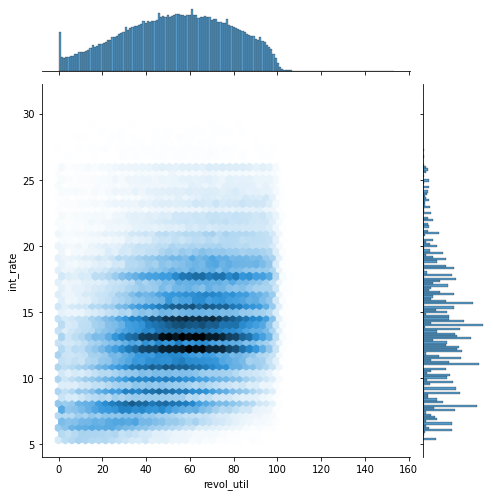

In [ ]:
# most intense at 12-14% int-rate, with 40-80% util
sns.jointplot(x='revol_util',y='int_rate',data=df,height=7,kind='hex');

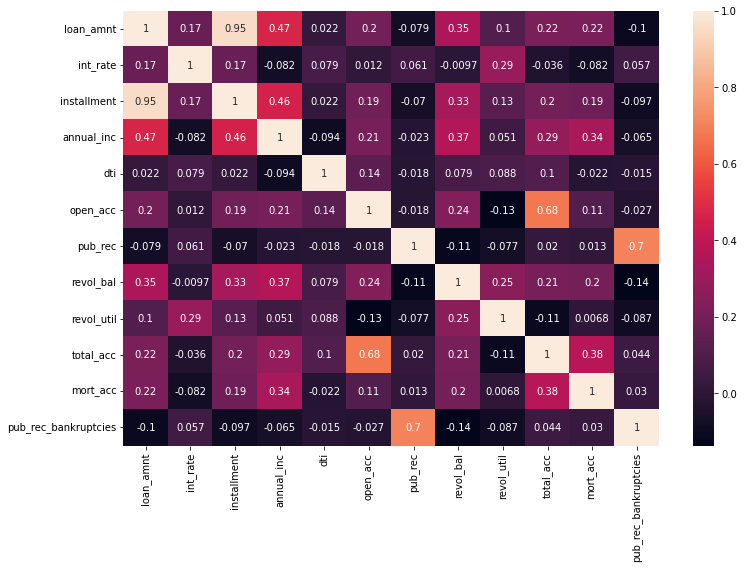

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

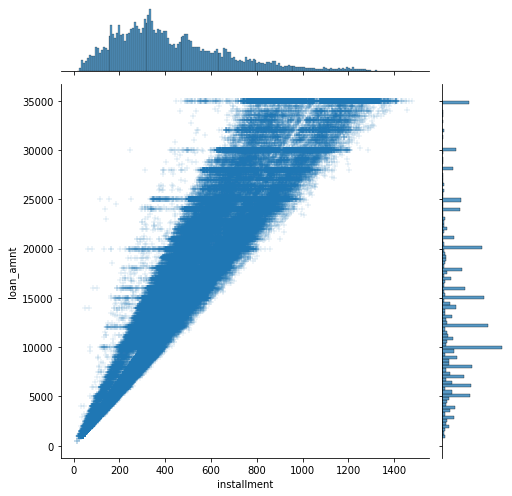

In [ ]:
# 0.7 correlation, higher loan = higher installment
sns.jointplot(x='installment',y='loan_amnt',data=df,height=7,marker='+',alpha=0.3);

In [ ]:
# sorting the sub_grade
subgrade_order = sorted(df['sub_grade'].unique())

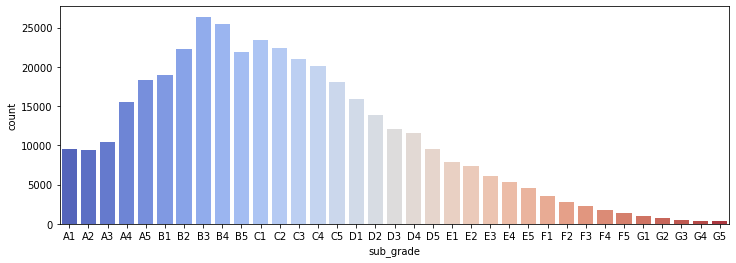

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(x='sub_grade',data=df,order=subgrade_order,palette='coolwarm')

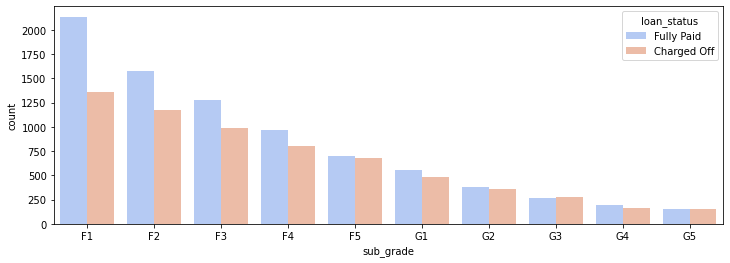

In [ ]:
f_and_g = df[(df['grade']=='F')|(df['grade']=='G')]

subgrade_order2 = ['F1','F2','F3','F4','F5','G1','G2','G3','G4','G5']

plt.figure(figsize=(12,4))
sns.countplot(x='sub_grade', data=f_and_g, order= subgrade_order2, palette='coolwarm', hue='loan_status')

In [ ]:
a = df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']

In [ ]:
b = df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']

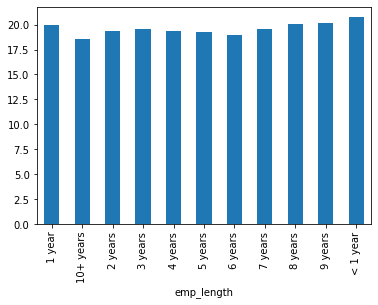

In [ ]:
# there's not much difference of ratio default & fully paid across employment length
(100*a/(a+b)).plot(kind='bar')

# This is the end of Exploratory & Exclusion

The correlation & exclusion between loan amount, interest rate, Grade and Annual income, revol_util is already tackled

Let's export this into csv

In [ ]:
# from 39,6030 data, after exclude outliers, become 39,1769 = 4,261 data excluded
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391769 entries, 329037 to 85293
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             391769 non-null  float64
 1   term                  391769 non-null  object 
 2   int_rate              391769 non-null  float64
 3   installment           391769 non-null  float64
 4   grade                 391769 non-null  object 
 5   sub_grade             391769 non-null  object 
 6   emp_title             369066 non-null  object 
 7   emp_length            373507 non-null  object 
 8   home_ownership        391769 non-null  object 
 9   annual_inc            391769 non-null  float64
 10  verification_status   391769 non-null  object 
 11  issue_d               391769 non-null  object 
 12  loan_status           391769 non-null  object 
 13  purpose               391769 non-null  object 
 14  title                 390033 non-null  object 
 

In [ ]:
folderpath ='/content/drive/MyDrive/13. Python/Machine Learning/TensorFlow_FILES/DATA/'

In [ ]:
df.to_csv(folderpath+"lending_club_exclude_outlier.csv", encoding="utf-8", index=False)